In [1]:
import sys
import os
XCr_path = os.getcwd()
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [21]:
Npoints = 50
delta_theta = 0.0
omega0 = 9000
#omegas = np.linspace(8999.8, 9000.6, Npoints)  
omegas = np.linspace(8998.8, 9001.6, Npoints)  

Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

In [22]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Crystal.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

def single_realization_with_data(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/Crystal.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field

In [ ]:
U1_data = []
U2_data = []

for i in range(0, Npoints):
    Rs[i], Ts[i], U1_xyz, U2_xyz = single_realization_with_data(delta_theta, omegas[i])
    U1_data.append(U1_xyz)
    U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Delta theta:  0.0 ; Reflectivity:  0.013786271383363979 ; Transmission:  0.34621671641833296
Delta theta:  0.0 ; Reflectivity:  0.033923941922557564 ; Transmission:  0.3430776675767068
Delta theta:  0.0 ; Reflectivity:  0.02196954716199065 ; Transmission:  0.3494517792600397
Delta theta:  0.0 ; Reflectivity:  0.00773158213259175 ; Transmission:  0.35783018000023337
Delta theta:  0.0 ; Reflectivity:  0.021465806591877294 ; Transmission:  0.3559102842501481
Delta theta:  0.0 ; Reflectivity:  0.009970809490667315 ; Transmission:  0.36296331596980996
Delta theta:  0.0 ; Reflectivity:  0.007895787860315372 ; Transmission:  0.3670582340140629
Delta theta:  0.0 ; Reflectivity:  0.016644411363925925 ; Transmission:  0.3665241720162307
Delta theta:  0.0 ; Reflectivity:  0.005059070436042853 ; Transmission:  0.37382479276846425
Delta theta:  0.0 ; Reflectivity:  0.010723133254035467 ; Transmission:  0.3752401974318741
Delta theta:  0.0 ; Reflectivity:  0.013501385128740362 ; Transmission:  0.377

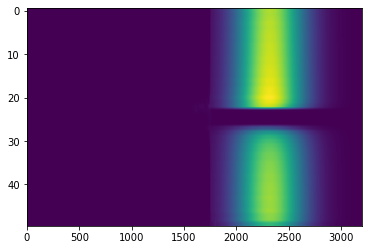

In [37]:
plt.imshow(np.abs(U2_xyz[:,:,5,-1]), aspect='auto')

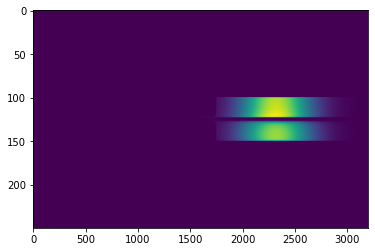

In [38]:
pad_shape = [(100,100), (0,0), (0,0), (0,0)]
utt = np.pad(U2_xyz, pad_shape, mode='constant', constant_values=(0.0 + 1j * 0.0, 0.0 + 1j * 0.0))
plt.imshow(np.abs(utt[:,:,5,-1]), aspect='auto')

In [39]:
U2_txyz = np.fft.fftshift(np.fft.ifft(utt, axis=0), axes=0)

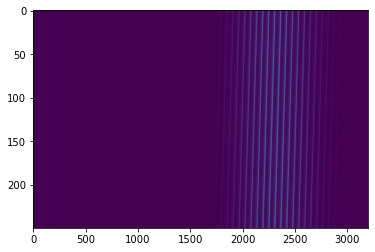

In [40]:
plt.imshow(np.abs(U2_txyz[:,:,5,-1]), aspect='auto')

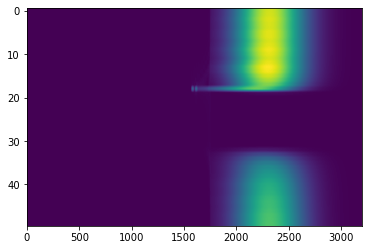

In [6]:
plt.imshow(np.abs(U2_xyz[:,:,5,-1]), aspect='auto')

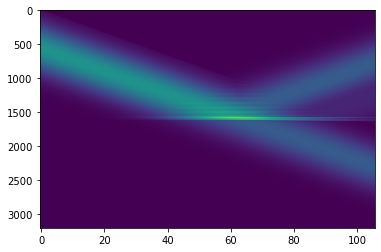

In [20]:
plt.imshow(np.abs(U1_xyz[18,:,5,:] + U2_xyz[17,:,5,:]), aspect='auto')

In [23]:
# for i in range(0, Npoints):
#     plt.figure()
#     plt.imshow(np.abs(data[i])[:,5,:], aspect='auto')
#     plt.colorbar()

In [4]:
for i in range(0, Npoints):
    Rs[i], Ts[i] = single_realization(delta_theta, omegas[i])

Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.034693866328164624 ; Transmission:  0.4139124866605232
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.030338496091547353 ; Transmission:  0.4195379377580391
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.008801892418734289 ; Transmission:  0.43190484461924855
Quiet mode disabled. I will talk a lot...
Congigured grid parameters
Congigured a Gaussian beam
Congigured deformation model
Splitting recipe: Euler
Initialized tools...
Delta theta:  0.0 ; Reflectivity:  0.034189

In [5]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [6]:
XOPfile = 'Si4009keVThickness50um'
XOPdata = np.loadtxt(XOPfile)

Text(0, 0.5, 'R')

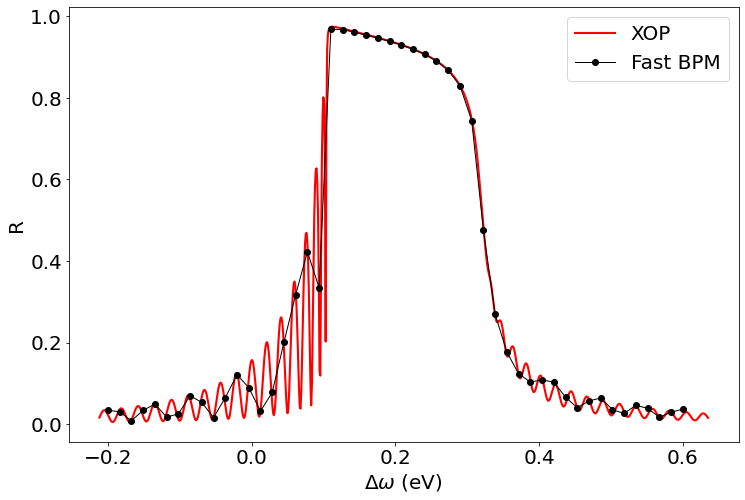

In [8]:
alphaB = 0.5320738025797507
dw = XOPdata[:,0]*4.848137 * 1e-6 * omega0 / np.tan(alphaB)

plt.plot(dw, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
plt.plot(omegas - omega0, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')

plt.legend()
plt.xlabel(r'$\Delta \omega$ (eV)')
plt.ylabel('R')